In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
gender_submission_df = pd.read_csv('gender_submission.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [8]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [9]:
train_df.drop('Cabin', axis=1, inplace=True)
train_df_cleaned = train_df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [10]:
# Converting categorical variables into numerical format
train_df_cleaned['Sex'] = train_df_cleaned['Sex'].map({'male': 0, 'female': 1})
train_df_cleaned['Embarked'] = train_df_cleaned['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [11]:
train_df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [12]:
sns.set(style="whitegrid")

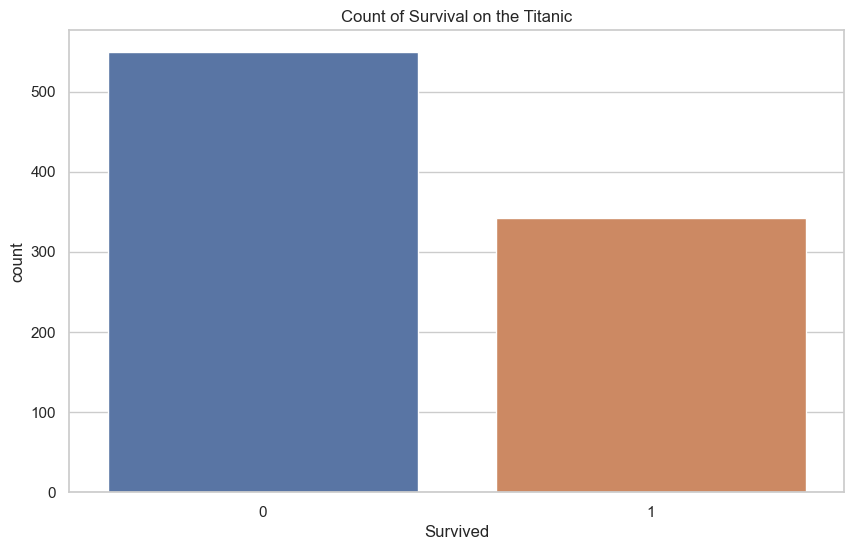

In [13]:
# 1. Countplot of Survived
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=train_df_cleaned)
plt.title('Count of Survival on the Titanic')
plt.show()

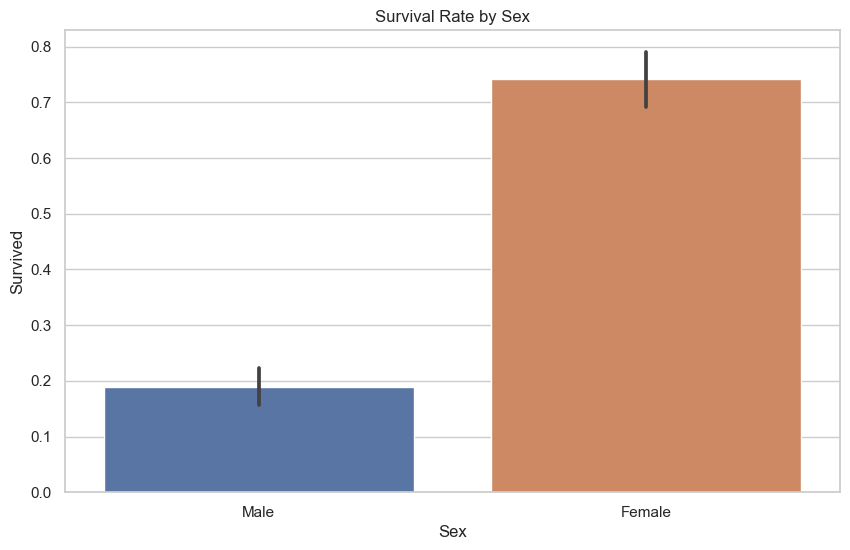

In [14]:
# 2. Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Survived', data=train_df_cleaned)
plt.title('Survival Rate by Sex')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

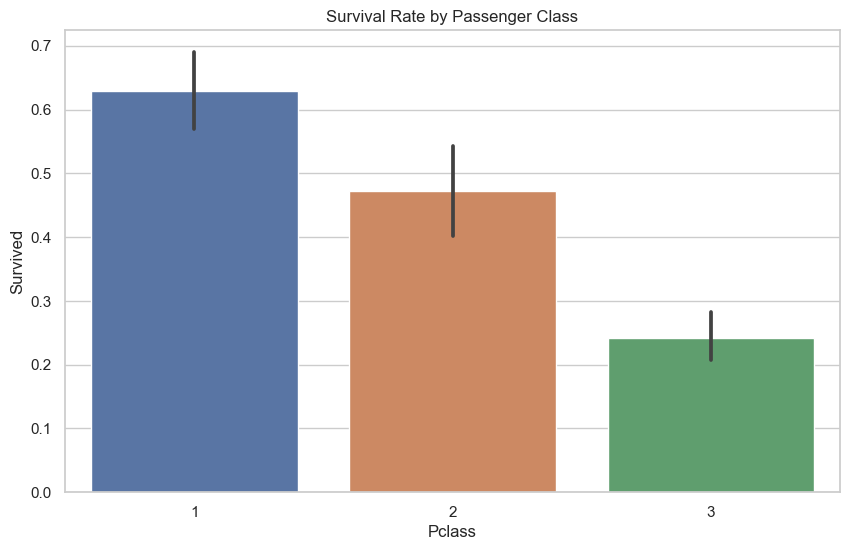

In [15]:
# 3. Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_df_cleaned)
plt.title('Survival Rate by Passenger Class')
plt.show()

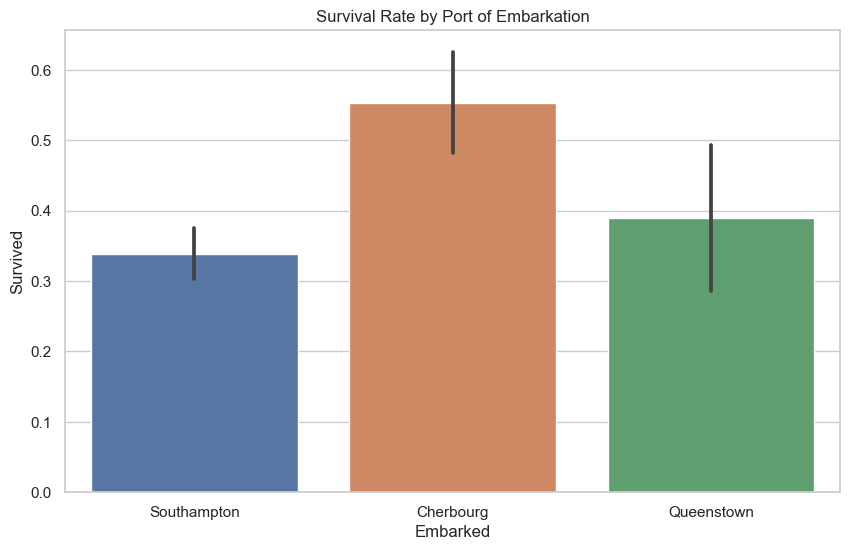

In [16]:
# 4. Survival rate by Embarked
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=train_df_cleaned)
plt.title('Survival Rate by Port of Embarkation')
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()